In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

import pylandstats as pls

sns.set()

In [42]:
URBAN_CLASS_VAL = 1

year_codes = ['00', '06', '12', '18']
city_slugs = ['basel', 'bern', 'geneve', 'lausanne', 'zurich']
# buffer_dists = [5000, 10000, 15000, 20000]

In [44]:
buffer_dists = list(range(1000, 20000, 1000))
base_mask_dict = {
    'basel': Point(7.58769, 47.55814),
    'bern': Point(7.4514512, 46.9482713),
    'geneve': Point(6.1466014, 46.2017559),
    'lausanne': Point(6.6327025, 46.5218269),
    'zurich': Point(8.5414061, 47.3769434)
}
base_mask_crs = {'init':'epsg:4326'}

In [45]:
city_year_ba_dict = {
    city_slug : {
        year_code : pls.BufferAnalysis(
            '../data/processed/agglomeration_extracts/'
            f'{city_slug}/{year_code}/{year_code}.tif',
            base_mask_dict[city_slug], buffer_dists=buffer_dists,
            base_mask_crs=base_mask_crs, metrics=['total_area'],
            classes=[URBAN_CLASS_VAL])
        for year_code in year_codes
    }
    for city_slug in city_slugs
}

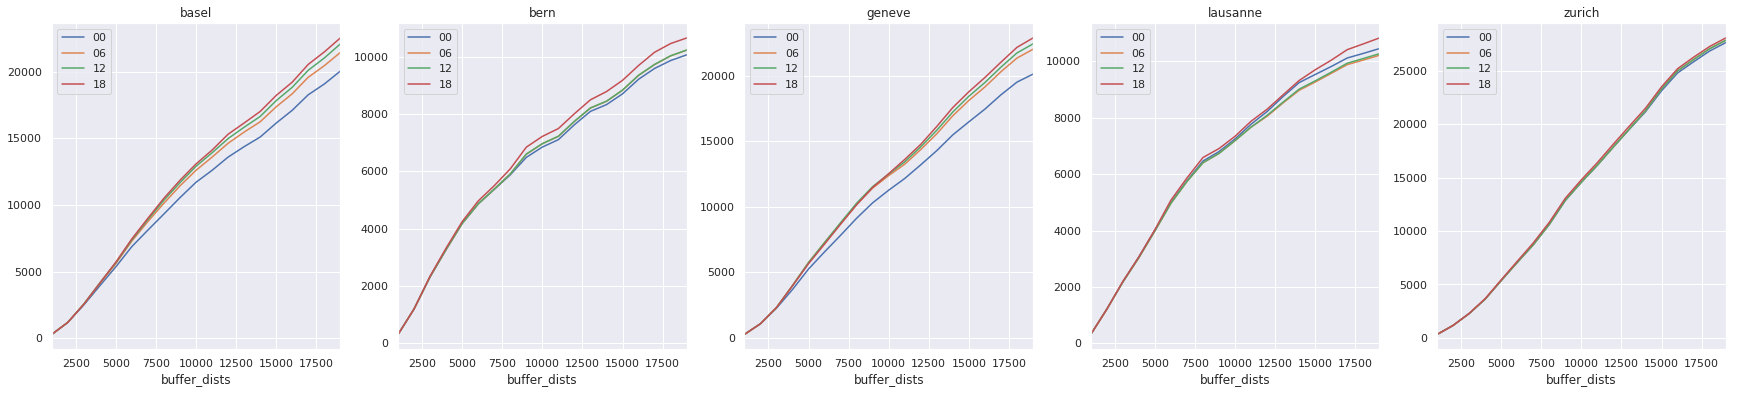

In [46]:
fig, axes = plt.subplots(1, len(city_slugs), figsize=(6 * len(city_slugs), 6))
for city_slug, ax in zip(city_slugs, axes):
    city_dict = city_year_ba_dict[city_slug]
    for year_code in city_dict:
        city_dict[year_code].class_metrics_df.loc[URBAN_CLASS_VAL]['total_area'].plot(
            ax=ax, label=year_code)
    ax.legend()
    ax.set_title(city_slug)